Q2.1(1)

In [ ]:
import seaborn as sns
import pandas as pd
from google.colab import files
from matplotlib.pyplot import figure

#https://www.youtube.com/watch?v=87RlNOp80Bk&t=19s&ab_channel=EvgeniyChernyshov

In [ ]:
#importing file into the notebook
files.upload()

Saving Mall_Customers.csv to Mall_Customers.csv


{'Mall_Customers.csv': b'CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)\r\n1,Male,19,15,39\r\n2,Male,21,15,81\r\n3,Female,20,16,6\r\n4,Female,23,16,77\r\n5,Female,31,17,40\r\n6,Female,22,17,76\r\n7,Female,35,18,6\r\n8,Female,23,18,94\r\n9,Male,64,19,3\r\n10,Female,30,19,72\r\n11,Male,67,19,14\r\n12,Female,35,19,99\r\n13,Female,58,20,15\r\n14,Female,24,20,77\r\n15,Male,37,20,13\r\n16,Male,22,20,79\r\n17,Female,35,21,35\r\n18,Male,20,21,66\r\n19,Male,52,23,29\r\n20,Female,35,23,98\r\n21,Male,35,24,35\r\n22,Male,25,24,73\r\n23,Female,46,25,5\r\n24,Male,31,25,73\r\n25,Female,54,28,14\r\n26,Male,29,28,82\r\n27,Female,45,28,32\r\n28,Male,35,28,61\r\n29,Female,40,29,31\r\n30,Female,23,29,87\r\n31,Male,60,30,4\r\n32,Female,21,30,73\r\n33,Male,53,33,4\r\n34,Male,18,33,92\r\n35,Female,49,33,14\r\n36,Female,21,33,81\r\n37,Female,42,34,17\r\n38,Female,30,34,73\r\n39,Female,36,37,26\r\n40,Female,20,37,75\r\n41,Female,65,38,35\r\n42,Male,24,38,92\r\n43,Male,48,39,36\r\n44,Female,31,

In [ ]:
#Q2.1.2.1
data =  pd.read_csv('Mall_Customers.csv')

data.columns=['CustomerID','Gender','Age','Annual Income (k$)', 'Spending Score (1-100)']
data.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Female = 112 
 Male = 88


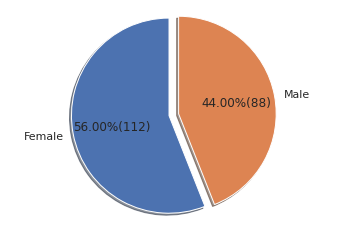

In [ ]:
#Q2.1.2.(a)
import matplotlib.pyplot as plt
y= data['Gender']
y.value_counts()
female_count=y.value_counts().Female
male_count=y.value_counts().Male
print("Female =",female_count, "\n", "Male =",male_count)
#Female    112
#Male       88
#Name: Gender, dtype: int64
labels= 'Female', 'Male'
sizes= [female_count,male_count]
explode=(0.1,0)

sns.set()
fig1, ax1= plt.subplots()
ax1.pie(sizes,explode=explode,labels=labels,shadow=True, startangle=90,autopct= lambda p: '{:.2f}%({:.0f})'.format(p,(p/100)*200))
ax1.axis('equal') 
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


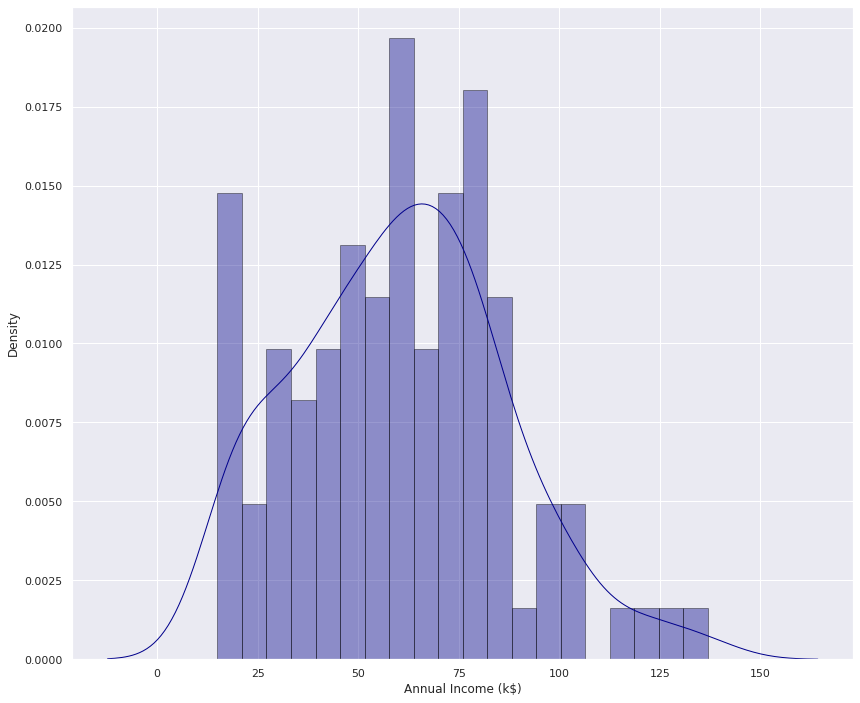

In [ ]:
sns.set(rc={'figure.figsize':(14,12)})
sns.distplot(data['Annual Income (k$)'], hist=True, kde=True, 
             bins=20, color = 'darkblue', vertical=False ,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 1})



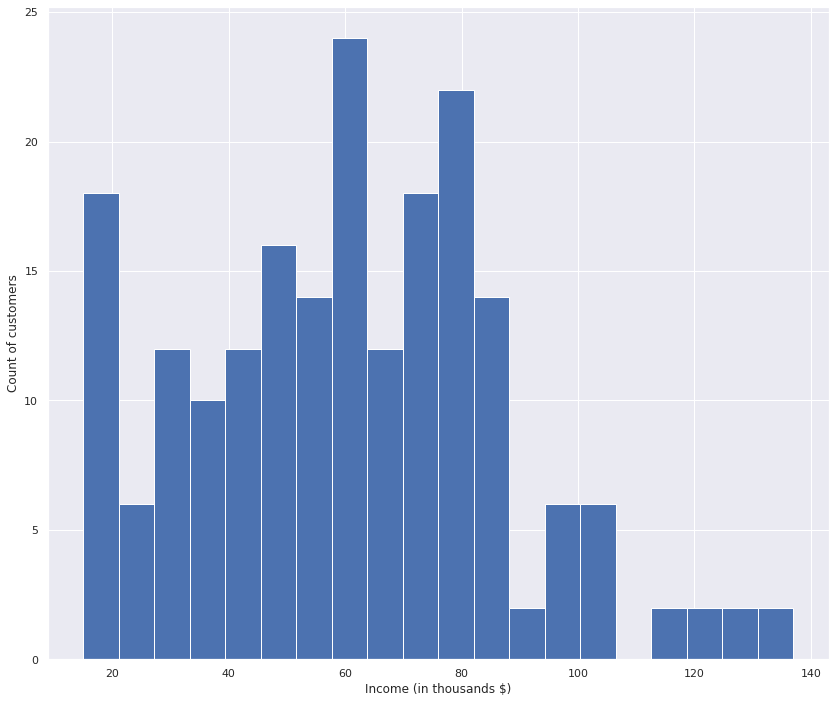

In [ ]:
income = data['Annual Income (k$)'] 

plt.hist(income, density=False, bins=20)
  # density=False would make counts
plt.plot(kind="kde")


plt.ylabel('Count of customers')
plt.xlabel('Income (in thousands $)')
plt.show()

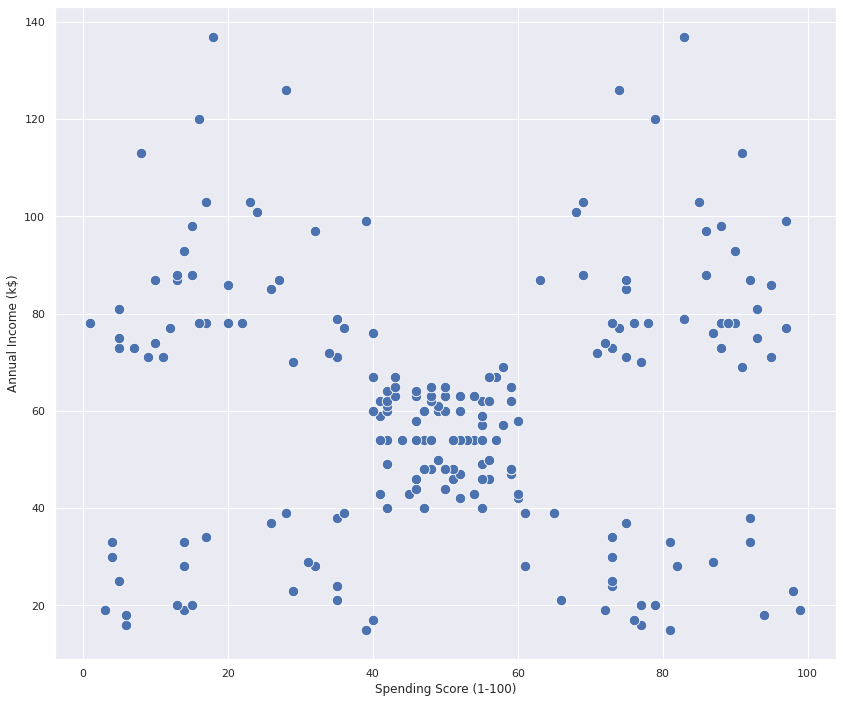

In [ ]:
#Q2partc

sns.scatterplot(data=data,y="Annual Income (k$)",x= "Spending Score (1-100)", s=110)

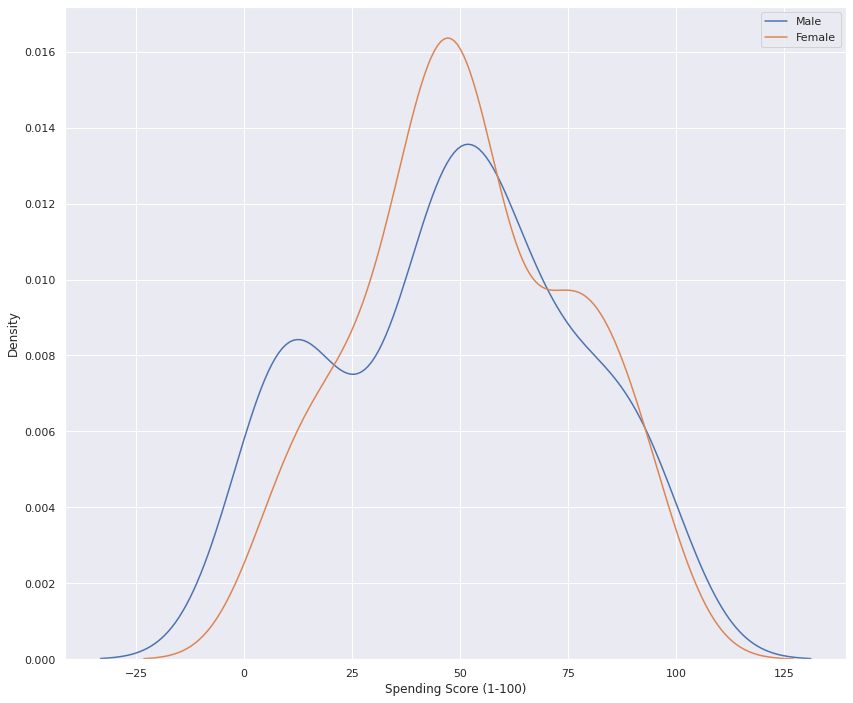

In [ ]:
#Q2part_d

df_male= data[data['Gender']=='Male']
df_female=data[data['Gender']=='Female']

labels=[""]
for datasource in [df_male,df_female]:
  sns.kdeplot(data=datasource['Spending Score (1-100)'])

plt.legend(labels=["Male","Female"])


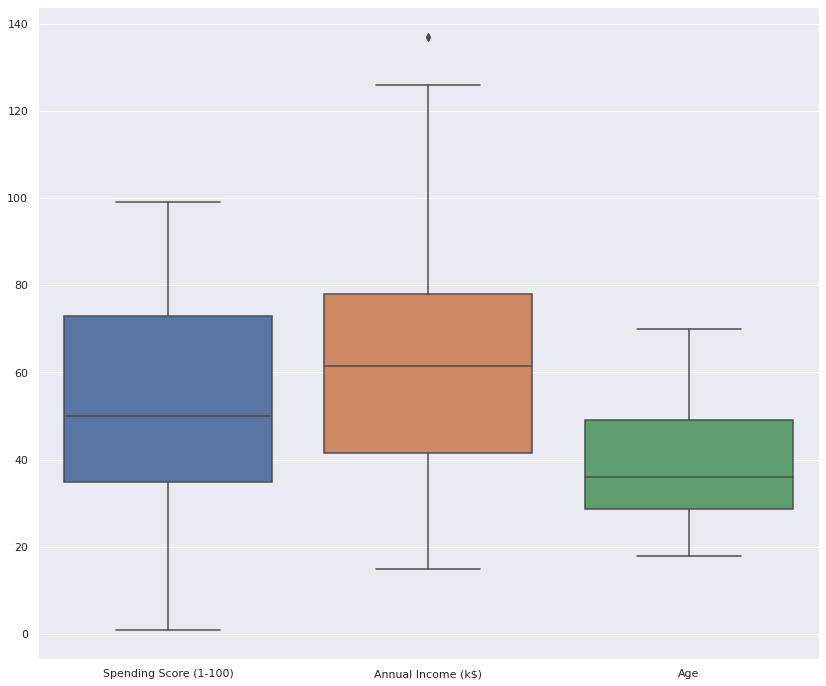

In [ ]:
#Q3
sns.boxplot(data=data.loc[:,['Spending Score (1-100)','Annual Income (k$)','Age']])

In [ ]:
def find_quantile(column):
  Q1=column.quantile(0.25)
  Q3=column.quantile(0.75)
  IQR=Q3-Q1
  print("Q1:",Q1)
  print("Q3:",Q3)
  print("IQR:",IQR)

  outliers1 = data[column>Q3+1.5*IQR].shape[0]
  outliers2=data[column<Q1-1.5*IQR].shape[0]
  percentage_outlier=(outliers1+outliers2)/column.shape[0];
  print("Percentage of outliers is ",percentage_outlier*100,"%\n")

  
  #print("Outliers for colum"outliers1+outliers2)

for col in data.columns[2:]:
  print("For column ",col )
  find_quantile(data[col])

For column  Age
Q1: 28.75
Q3: 49.0
IQR: 20.25
Percentage of outliers is  0.0 %

For column  Annual Income (k$)
Q1: 41.5
Q3: 78.0
IQR: 36.5
Percentage of outliers is  1.0 %

For column  Spending Score (1-100)
Q1: 34.75
Q3: 73.0
IQR: 38.25
Percentage of outliers is  0.0 %



In [ ]:
!pip install kneed

from kneed import KneeLocator
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [ ]:
data_kmeans= data.loc[:,["Spending Score (1-100)","Annual Income (k$)","Age"]]
#standarize the data so the entire thing is in comparable uiniotsst

transformer = StandardScaler()

standardized_data_kmeans = transformer.fit_transform(data_kmeans)
#print(standardized_data_kmeans[:10])  #beacuse after transformation,its a numpy array

In [ ]:
#kmeans_container = KMeans(init="k-means++", n_clusters=3, n_init=40, max_iter=200 )

In [ ]:
#kmeans_container.fit(standardized_data_kmeans)
#kmeans_container.inertia_
#kmeans_container.labels_[:20]
#295.2122461555488 for n_clusters=3, n_init=40, max_iter=200
ssq_list=[]
for k_value in range(1,11):
  
  kmeans_container = kmeans_container = KMeans(init="random", n_clusters=k_value, n_init=10, max_iter=300 )
  kmeans_container.fit(standardized_data_kmeans)
  ssq_list.append(tuple((kmeans_container.inertia_,k_value)))


for r in ssq_list:
 print(r,"\n")
#plt.scatter(standardized_data_kmeans[:,0],standardized_data_kmeans[:,1], standardized_data_kmeans[:,2], c=kmeans_container.labels_,linewidths=6,cmap='rainbow')

ssq_plotdata = pd.DataFrame(ssq_list, columns=['SSQ','Number of clusters'])


(600.0, 1) 

(389.3861889564372, 2) 

(295.4562449213557, 3) 

(205.22514747675916, 4) 

(168.24758017556837, 5) 

(133.86833362685584, 6) 

(117.13060763524547, 7) 

(104.09784107506621, 8) 

(93.03539426669138, 9) 

(83.096944929093, 10) 



In [ ]:
print(standardized_data_kmeans.shape)

(200, 3)


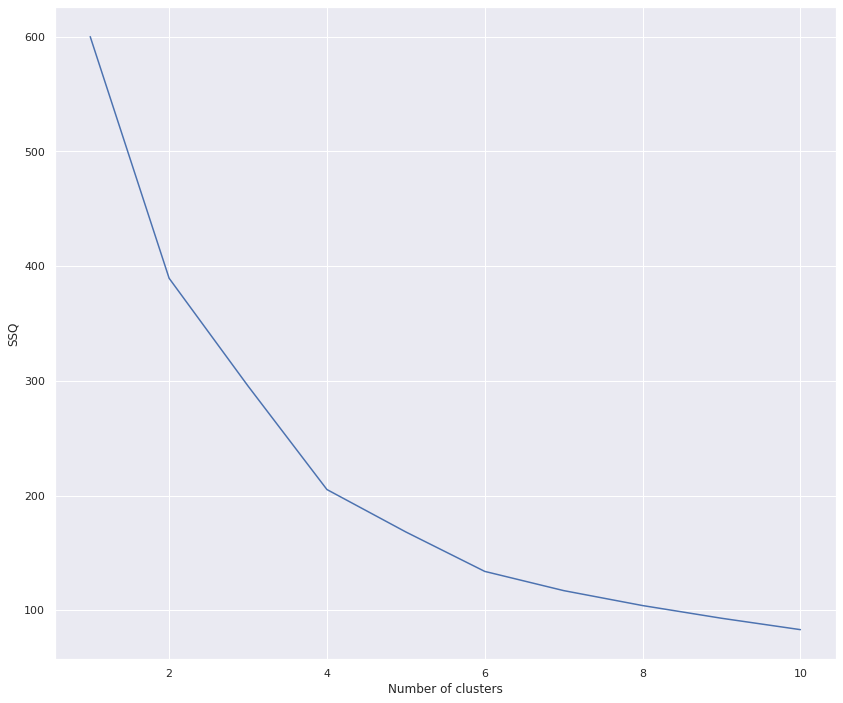

In [ ]:
ssq_plotdata.head(100)
sns.lineplot(data=ssq_plotdata,x="Number of clusters",y="SSQ")

In [ ]:
k1=KneeLocator(range(1,11),ssq_plotdata["SSQ"],curve="convex",direction="decreasing")
k1.elbow
#by eyeball test, it can be seen the elbow point occurs at k=4


4

In [ ]:
#Q2.2.2
import numpy as np

K_OPTIMAL=4
standardized_data_gmm = np.delete(standardized_data_kmeans,2,1)
from sklearn.mixture import GaussianMixture as GMM
gmm_container= GMM(n_components=4)
gmm_container.fit(standardized_data_gmm)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=4, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [ ]:
labels_gmm= gmm_container.predict(standardized_data_gmm)
print((labels_gmm))

[1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1
 3 1 3 1 3 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 0 1 0 2 0 1 0 1 0 1 0 2 0 1 0 1 0 2 1 2 0 2 0 1
 0 2 0 2 0 1 0 2 0 1 0 1 0 2 0 2 0 1 0 2 0 1 0 1 0 2 0 2 0 1 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


In [ ]:
#gmm_columns=[standardized_data_kmeans,labels_gmm]

gmm_plotdata=pd.DataFrame(list(zip(standardized_data_kmeans, labels_gmm)),
              columns=['lst1_title','lst2_title'])
gmm_plotdata.tail(20)

,lst1_title,lst2_title
180,"[-0.7065524049498657, 1.3908939990193845, -0.1...",0
181,"[1.3898118734728124, 1.3908939990193845, -0.49...",2
182,"[-1.3665189370458939, 1.429063428191157, 0.513...",0
183,"[1.4674549948958746, 1.429063428191157, -0.706...",2
184,"[-0.43480147996914814, 1.4672328573629292, 0.1...",0
185,"[1.8168490412996543, 1.4672328573629292, -0.63...",2
186,"[-1.0171248906421142, 1.543571715706474, 1.087...",0
187,"[0.691023780665253, 1.543571715706474, -0.7786...",2
188,"[-1.288875815622832, 1.6199105740500186, 0.154...",0
189,"[1.3509903127612812, 1.6199105740500186, -0.20...",2


Text(0.5, 0, 'Spending Score (standardized values)')

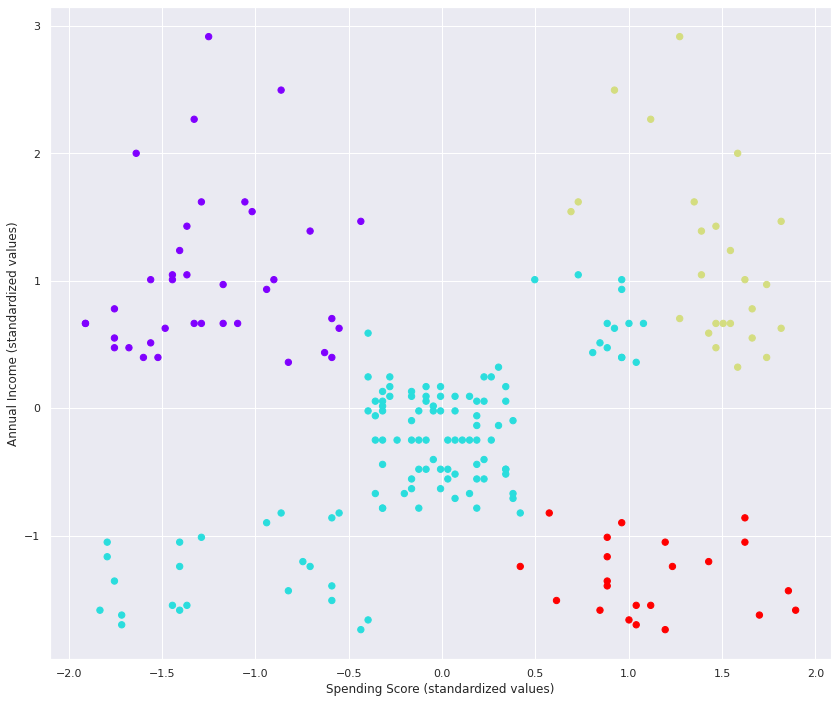

In [ ]:
plt.scatter(standardized_data_gmm[:,0],standardized_data_gmm[:,1],  c=labels_gmm,s=40,cmap='rainbow')
plt.ylabel('Annual Income (standardized values)')
plt.xlabel('Spending Score (standardized values)')

(200, 2)


Text(0.5, 0, 'Spending Score (standardized values)')

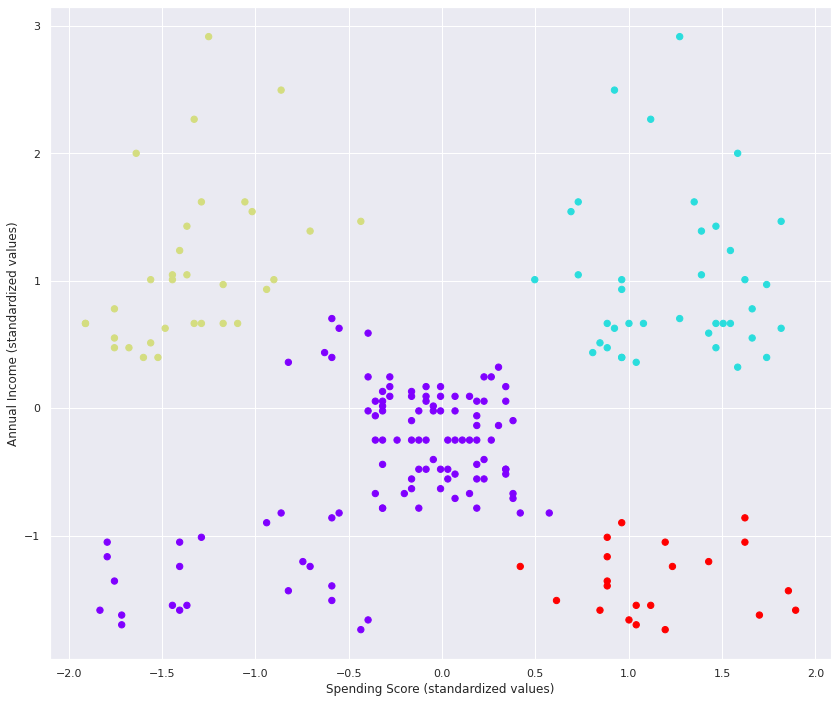

In [ ]:
from sklearn.cluster import AgglomerativeClustering as AC
AC_container =AC(n_clusters=4, linkage='ward')
print(standardized_data_gmm.shape)
AC_container.fit(standardized_data_gmm)
AC_labels= AC_container.labels_
plt.scatter(standardized_data_gmm[:,0],standardized_data_gmm[:,1],  c=AC_labels,s=40,cmap='rainbow')
plt.ylabel('Annual Income (standardized values)')
plt.xlabel('Spending Score (standardized values)')


In [ ]:
from sklearn.cluster import AgglomerativeClustering as AC
AC_container =AC(n_clusters=4, linkage='ward')
print(standardized_data_gmm.shape)
AC_container.fit(standardized_data_gmm)
AC_labels= AC_container.labels_
plt.scatter(standardized_data_gmm[:,0],standardized_data_gmm[:,1],  c=AC_labels,s=40,cmap='rainbow')
plt.ylabel('Annual Income (standardized values)')
plt.xlabel('Spending Score (standardized values)')


Text(0.5, 0, 'Spending Score (standardized values)')

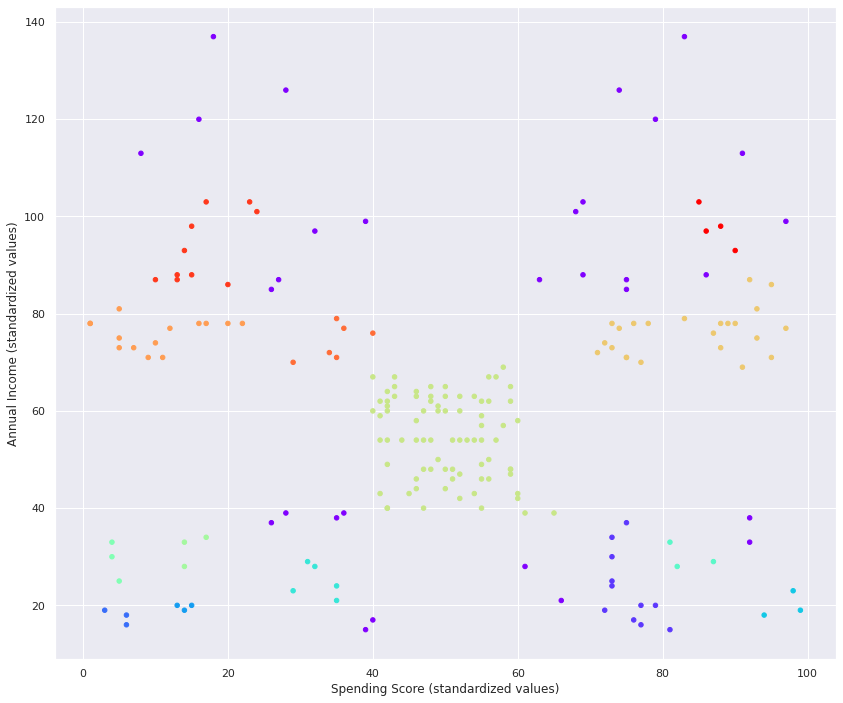

In [ ]:
from sklearn.cluster import DBSCAN
data_dbscan= data.loc[:,["Spending Score (1-100)","Annual Income (k$)"]]
data_dbscan=np.array(data_dbscan)
DB_container= DBSCAN(eps=6,min_samples=3,algorithm="ball_tree").fit(data_dbscan)

plt.scatter(data_dbscan[:,0],data_dbscan[:,1], c=DB_container.labels_,s=20,cmap='rainbow')
plt.ylabel('Annual Income (standardized values)')
plt.xlabel('Spending Score (standardized values)')

(200, 2)
<class 'numpy.ndarray'>


Text(0.5, 0, 'Spending Score (standardized values)')

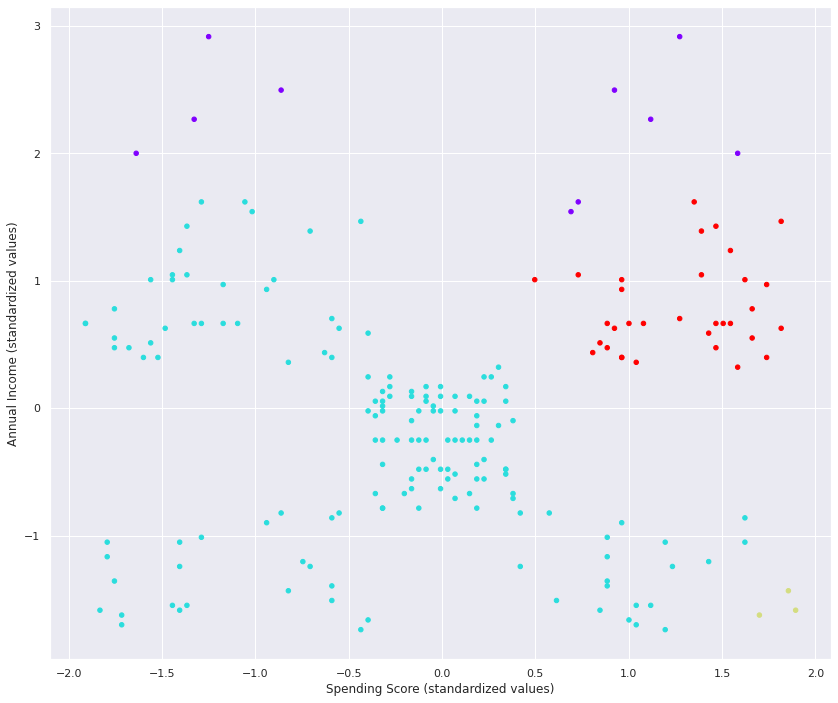

In [ ]:
from sklearn.cluster import DBSCAN
DB_container= DBSCAN(eps=0.42,min_samples=3)
DB_container.fit(standardized_data_gmm)
print(standardized_data_gmm.shape)
print(type(standardized_data_gmm))
DB_labels=DB_container.fit_predict(standardized_data_gmm)

plt.scatter(standardized_data_gmm[:,0],standardized_data_gmm[:,1], c=DB_labels,s=20,cmap='rainbow')
plt.ylabel('Annual Income (standardized values)')
plt.xlabel('Spending Score (standardized values)')